<a href="https://colab.research.google.com/github/odenmehmet/DL_Project/blob/main/YOLO_Nesne_Tespit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



0: 640x480 4 persons, 1 bus, 7.1ms
Speed: 2.6ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


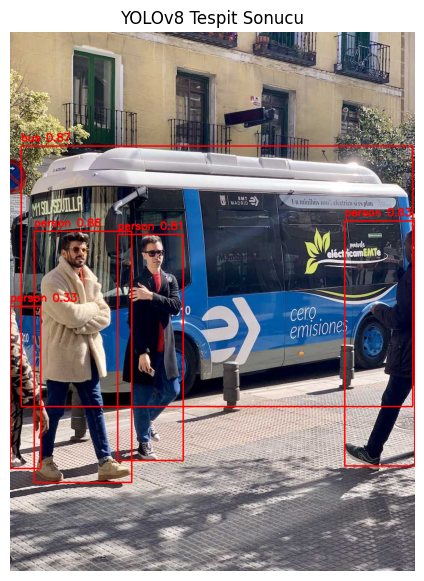

In [5]:
model = YOLO('yolov8n.pt')

url = 'https://ultralytics.com/images/bus.jpg'
import urllib.request
urllib.request.urlretrieve(url, 'bus.jpg')
img = cv2.imread('bus.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = model(img_rgb)

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        label = model.names[cls]
        img_rgb = cv2.rectangle(img_rgb, (x1,y1), (x2,y2), (255,0,0), 2)
        img_rgb = cv2.putText(img_rgb, f"{label} {conf:.2f}", (x1, y1-10),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
plt.figure(figsize=(10,7))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("YOLOv8 Tespit Sonucu")
plt.show()

In [6]:
import cv2
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
cap = cv2.VideoCapture(0)  # 0 = laptop kamera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    # Sonuçları kolayca çizmek için:
    annotated_frame = results[0].plot()  # YOLO'nun hazır fonksiyonu

    cv2.imshow("YOLOv8 Tespit (q = çıkış)", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
